# Data Prepare

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, Dropout, Input, Flatten, Concatenate

In [ ]:
same_df = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/one_hot_same.csv')
int_df = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/one_hot_int.csv')

##### Final

In [ ]:
# Boolean
same_df['Covid19'] = same_df['Covid19'].apply(lambda x: 1 if x else 0)
int_df['Covid19'] = int_df['Covid19'].apply(lambda x: 1 if x else 0)

boolean_columns = [
    "Covid19",
    "US_President_Republican",
    "US_President_Democratic",
    "KR_President_Democratic",
    "KR_President_Conservative",
    "KR_President_Neutral"
]

same_df[boolean_columns] = same_df[boolean_columns].astype(bool)
int_df[boolean_columns] = int_df[boolean_columns].astype(bool)

# Set Index
same_df.set_index('Date', inplace = True)
int_df.set_index('Date', inplace = True)

# Normalization
features = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction','SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation', 'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate', 'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican', 'US_President_Democratic', 'KR_President_Democratic', 'KR_President_Conservative', 'KR_President_Neutral']
target = ['Close']

x_same = same_df[features].values
y_same = same_df[target].values

x_scaler, y_scaler = MinMaxScaler(), MinMaxScaler()

x_same_scaled = x_scaler.fit_transform(x_same)
y_same_scaled = y_scaler.fit_transform(y_same.reshape(-1, 1))

x_int = int_df[features].values
y_int = int_df[target].values

x_scaler, y_scaler = MinMaxScaler(), MinMaxScaler()

x_int_scaled = x_scaler.fit_transform(x_int)
y_int_scaled = y_scaler.fit_transform(y_int.reshape(-1, 1))

# Train, Test Split
x_train_same_df = x_same_scaled[:3519]
y_train_same_df = y_same_scaled[:3519]

x_val_same_df = x_same_scaled[3519:4692]
y_val_same_df = y_same_scaled[3519:4692]

x_test_same_df = x_same_scaled[4692:]
y_test_same_df = y_same_scaled[4692:]

x_train_int_df = x_int_scaled[:3519]
y_train_int_df = y_int_scaled[:3519]

x_val_int_df = x_int_scaled[3519:4692]
y_val_int_df = y_int_scaled[3519:4692]

x_test_int_df = x_int_scaled[4692:]
y_test_int_df = y_int_scaled[4692:]

##### Final - Feature Selection

In [ ]:
# Normalization
selected_features = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction','SE_Foreign', 'US_Inflation', 'KR_Inflation', 'US_10', 'KR_10', 'WTI', 'Exchange', 'SOX_Close']
target = ['Close']

selected_x_same = same_df[selected_features].values
selected_y_same = same_df[target].values

x_scaler, y_scaler = MinMaxScaler(), MinMaxScaler()

selected_x_same_scaled = x_scaler.fit_transform(selected_x_same)
selected_y_same_scaled = y_scaler.fit_transform(selected_y_same.reshape(-1, 1))

selected_x_int = int_df[selected_features].values
selected_y_int = int_df[target].values

x_scaler, y_scaler = MinMaxScaler(), MinMaxScaler()

selected_x_int_scaled = x_scaler.fit_transform(selected_x_int)
selected_y_int_scaled = y_scaler.fit_transform(selected_y_int.reshape(-1, 1))

# Train, Test Split
selected_x_train_same_df = selected_x_same_scaled[:3519]
selected_y_train_same_df = selected_y_same_scaled[:3519]

selected_x_val_same_df = selected_x_same_scaled[3519:4692]
selected_y_val_same_df = selected_y_same_scaled[3519:4692]

selected_x_test_same_df = selected_x_same_scaled[4692:]
selected_y_test_same_df = selected_y_same_scaled[4692:]

selected_x_train_int_df = selected_x_int_scaled[:3519]
selected_y_train_int_df = selected_y_int_scaled[:3519]

selected_x_val_int_df = selected_x_int_scaled[3519:4692]
selected_y_val_int_df = selected_y_int_scaled[3519:4692]

selected_x_test_int_df = selected_x_int_scaled[4692:]
selected_y_test_int_df = selected_y_int_scaled[4692:]

# Model Setting

In [ ]:
!pip install wandb -qU

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 96.8 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow

In [ ]:
import wandb
from wandb.integration.keras import WandbCallback

In [ ]:
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
# GPU가 사용 가능한지 확인
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # 첫 번째 GPU 메모리를 다 사용할 수 있도록 설정 (필요에 따라 조정 가능)
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print("GPU is set to be used.")
    except RuntimeError as e:
        print(f"Error setting GPU memory growth: {e}")
else:
    print("No GPU found. Using CPU instead.")

GPU is set to be used.


In [ ]:
def create_sequences(X, y, time_steps):
    sequences, labels = [], []
    for i in range(len(X) - time_steps):
        sequences.append(X[i:i+time_steps])
        labels.append(y[i+time_steps])
    return np.array(sequences), np.array(labels)

def rmse_metric(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

In [ ]:
class Attention(tf.keras.layers.Layer):
    def __init__(self):
        super(Attention, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], input_shape[-1]), initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[-1],), initializer="zeros")
        super(Attention, self).build(input_shape)

    def call(self, x):
        score = tf.nn.tanh(tf.tensordot(x, self.W, axes=1) + self.b)
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * x
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector

In [ ]:
class MultiHeadAttentionLayer(tf.keras.layers.Layer):
    def __init__(self, num_heads, key_dim):
        super(MultiHeadAttentionLayer, self).__init__()
        self.attention = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)

    def call(self, query, value):
        return self.attention(query=query, value=value, key=value)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # 모니터할 지표 (예: 'val_loss' 또는 'val_rmse')
    patience=5,          # 성능 향상이 없는 epoch 수 (5번 동안 개선 없으면 중단)
    restore_best_weights=True,  # 가장 성능이 좋은 가중치를 복원
    #verbose=1            # 로그 출력 여부
)

# Same

##### base

In [ ]:
wandb.init(project="LSTM - Same", name="initial", config={
    "epochs": 30,
    "batch_size": 32,
    "time_steps": 30,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "rmse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Initial.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(x_train_same_df, y_train_same_df, time_steps)
X_val, y_val = create_sequences(x_val_same_df, y_val_same_df, time_steps)

model_same_init = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(features)), return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),
    tf.keras.layers.Dense(1)
])

model_same_init.compile(optimizer=wandb.config.optimizer, loss=rmse_metric, metrics=[rmse_metric])

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_same_init.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_rmse": history.history['rmse_metric'][0],
        "val_rmse": history.history['val_rmse_metric'][0],
    })

model_same_init.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
106/110 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1023 - rmse_metric: 0.1023
Epoch 1: val_loss improved from inf to 0.15184, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Initial.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0999 - rmse_metric: 0.0999 - val_loss: 0.1518 - val_rmse_metric: 0.1527
Epoch 2/30
105/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0307 - rmse_metric: 0.0307
Epoch 1: val_loss did not improve from 0.15184
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0305 - rmse_metric: 0.0305 - val_loss: 0.1647 - val_rmse_metric: 0.1657
Epoch 3/30
106/110 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0227 - rmse_metric: 0.0227
Epoch 1: val_loss improved from 0.15184 to 0.14270, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Initial.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0226 - rmse_metric: 0.0226 - val_loss: 0.1427 - val_rmse_metric: 0.1434


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 30, 64)              │          25,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176,069 (687.77 KB)

 Trainable params: 58,689 (229.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 117,380 (458.52 KB)

In [ ]:
wandb.finish()

##### Hyper1

In [ ]:
wandb.init(project="LSTM - Same", name="hyper1", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 5,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "rmse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/hyper1.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(x_train_same_df, y_train_same_df, time_steps)
X_val, y_val = create_sequences(x_val_same_df, y_val_same_df, time_steps)

model_same_hyper1 = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(features)), return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),
    tf.keras.layers.Dense(1)
])

model_same_hyper1.compile(optimizer=wandb.config.optimizer, loss=rmse_metric, metrics=[rmse_metric])

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_same_hyper1.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_rmse": history.history['rmse_metric'][0],
        "val_rmse": history.history['val_rmse_metric'][0],
    })

model_same_hyper1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
103/110 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1063 - rmse_metric: 0.1063
Epoch 1: val_loss improved from inf to 0.14744, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/hyper1.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.1025 - rmse_metric: 0.1025 - val_loss: 0.1474 - val_rmse_metric: 0.1488
Epoch 2/50
109/110 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0251 - rmse_metric: 0.0251
Epoch 1: val_loss improved from 0.14744 to 0.12363, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/hyper1.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0251 - rmse_metric: 0.0251 - val_loss: 0.1236 - val_rmse_metric: 0.1246
Epoch 3/50
109/110 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0230 - rmse_metric: 0.0230
Epoch 1: val_loss did not improve from 0.12363
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0230 - rmse_metric: 0.0230 - val_loss: 0.1266 - val_rmse_metric: 0.1276
Epo

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 5, 64)               │          25,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176,069 (687.77 KB)

 Trainable params: 58,689 (229.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 117,380 (458.52 KB)

In [ ]:
wandb.finish()

In [ ]:
wandb.init(project="LSTM - Same", name="hyper1", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 5,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "rmse",
},reinit=True)

model_test = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(features)), return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),
    tf.keras.layers.Dense(1)
])

model_test.load_weights('/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/hyper1.weights.h5')

model_same_init.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 30, 64)              │          25,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176,069 (687.77 KB)

 Trainable params: 58,689 (229.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 117,380 (458.52 KB)

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


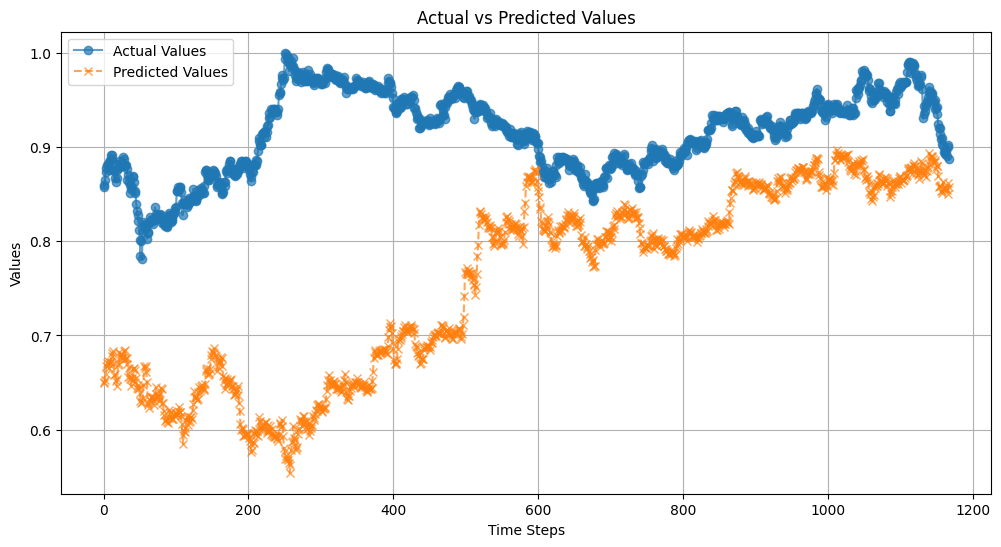

In [ ]:
X_test, y_test = create_sequences(x_test_same_df, y_test_same_df, wandb.config.time_steps)

y_pred = model_test.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### hyper2

In [ ]:
wandb.init(project="LSTM - Same", name="hyper2", config={
    "epochs": 50,
    "batch_size": 64,
    "time_steps": 5,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "rmse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/hyper2.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(x_train_same_df, y_train_same_df, time_steps)
X_val, y_val = create_sequences(x_val_same_df, y_val_same_df, time_steps)

model_same_hyper2 = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(features)), return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),
    tf.keras.layers.Dense(1)
])

model_same_hyper2.compile(optimizer=wandb.config.optimizer, loss=rmse_metric, metrics=[rmse_metric])

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_same_hyper2.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_rmse": history.history['rmse_metric'][0],
        "val_rmse": history.history['val_rmse_metric'][0],
    })

model_same_hyper2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
48/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1540 - rmse_metric: 0.1540
Epoch 1: val_loss improved from inf to 0.15895, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/hyper2.weights.h5
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1437 - rmse_metric: 0.1437 - val_loss: 0.1590 - val_rmse_metric: 0.1632
Epoch 2/50
48/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0284 - rmse_metric: 0.0284
Epoch 1: val_loss improved from 0.15895 to 0.15387, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/hyper2.weights.h5
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0283 - rmse_metric: 0.0283 - val_loss: 0.1539 - val_rmse_metric: 0.1574
Epoch 3/50
48/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0252 - rmse_metric: 0.0252
Epoch 1: val_loss improved from 0.15387 to 0.14104, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/hyper2.weights.h5
55/55 ━━━━━━━━━━━━━━━━━━━

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 5, 64)               │          25,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176,069 (687.77 KB)

 Trainable params: 58,689 (229.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 117,380 (458.52 KB)

In [ ]:
wandb.finish()

##### hyper3

In [ ]:
wandb.init(project="LSTM - Same", name="hyper3", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 5,
    "lstm_units": [64, 64, 64],
    "optimizer": "adam",
    "loss": "rmse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/hyper3.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    #verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(x_train_same_df, y_train_same_df, time_steps)
X_val, y_val = create_sequences(x_val_same_df, y_val_same_df, time_steps)

model_same_hyper3 = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(features)), return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[2], activation='tanh'),
    tf.keras.layers.Dense(1)
])

model_same_hyper3.compile(optimizer=wandb.config.optimizer, loss=rmse_metric, metrics=[rmse_metric])

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_same_hyper3.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_rmse": history.history['rmse_metric'][0],
        "val_rmse": history.history['val_rmse_metric'][0],
    })

model_same_hyper3.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1360 - rmse_metric: 0.1360 - val_loss: 0.1366 - val_rmse_metric: 0.1377
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0266 - rmse_metric: 0.0266 - val_loss: 0.1700 - val_rmse_metric: 0.1712
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0247 - rmse_metric: 0.0247 - val_loss: 0.1222 - val_rmse_metric: 0.1232
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0226 - rmse_metric: 0.0226 - val_loss: 0.1300 - val_rmse_metric: 0.1310
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0195 - rmse_metric: 0.0195 - val_loss: 0.1341 - val_rmse_metric: 0.1350
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0198 - rmse_metric: 0.0198 - val_loss: 0.1182 - val_rmse_metric: 0.1191
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0193 - rmse_metric: 0.0193 - val_loss: 0.1285 - val_rmse_metric: 0.1295
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - los

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_17 (LSTM)                       │ (None, 5, 64)               │          25,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, 5, 64)               │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 275,141 (1.05 MB)

 Trainable params: 91,713 (358.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 183,428 (716.52 KB)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


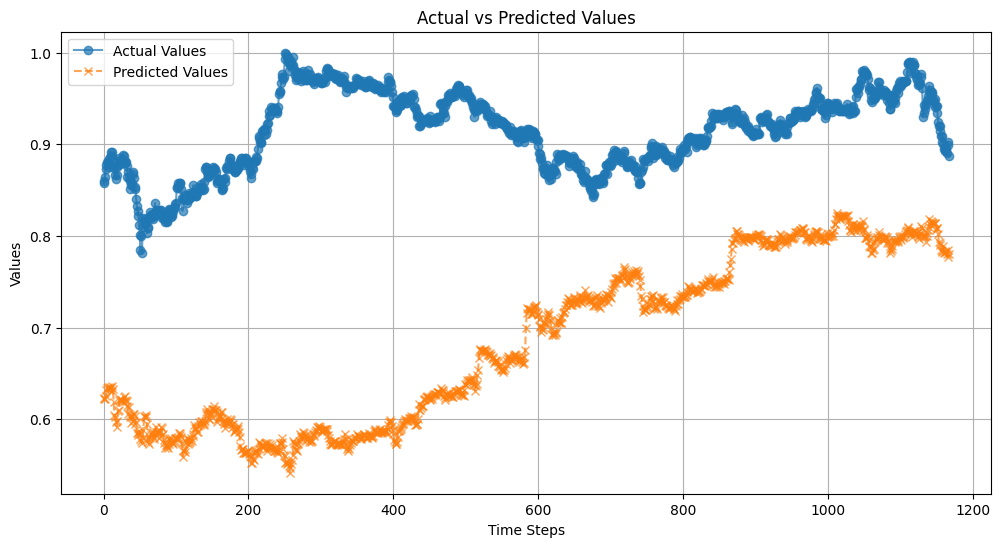

In [ ]:
X_test, y_test = create_sequences(x_test_same_df, y_test_same_df, wandb.config.time_steps)

y_pred = model_same_hyper3.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### hyper4

In [ ]:
wandb.login(relogin=True)

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
wandb.init(project="LSTM - Same", name="hyper4", config={
    "epochs": 50,
    "batch_size": 64,
    "time_steps": 5,
    "lstm_units": [64, 64, 64],
    "optimizer": "adam",
    "loss": "rmse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/hyper4.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    #verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(x_train_same_df, y_train_same_df, time_steps)
X_val, y_val = create_sequences(x_val_same_df, y_val_same_df, time_steps)

model_same_hyper4 = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(features)), return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[2], activation='tanh'),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_same_hyper4.compile(optimizer=wandb.config.optimizer, loss=rmse_metric, metrics=[rmse_metric])

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_same_hyper4.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_rmse": history.history['rmse_metric'][0],
        "val_rmse": history.history['val_rmse_metric'][0],
    })

model_same_hyper4.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.2014 - rmse_metric: 0.2014 - val_loss: 0.1802 - val_rmse_metric: 0.1862
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0329 - rmse_metric: 0.0329 - val_loss: 0.1831 - val_rmse_metric: 0.1887
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0258 - rmse_metric: 0.0258 - val_loss: 0.1791 - val_rmse_metric: 0.1845
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0221 - rmse_metric: 0.0221 - val_loss: 0.1829 - val_rmse_metric: 0.1883
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0203 - rmse_metric: 0.0203 - val_loss: 0.1749 - val_rmse_metric: 0.1801
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0215 - rmse_metric: 0.0215 - val_loss: 0.1866 - val_rmse_metric: 0.1920
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0199 - rmse_metric: 0.0199 - val_loss: 0.1762 - val_rmse_metric: 0.1813
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0183 - rmse_

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                       │ (None, 5, 64)               │          25,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_21 (LSTM)                       │ (None, 5, 64)               │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_22 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 287,621 (1.10 MB)

 Trainable params: 95,873 (374.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 191,748 (749.02 KB)

In [ ]:
wandb.finish()

##### hyper5

In [ ]:
wandb.finish()

In [ ]:
wandb.init(project="LSTM - Same", name="hyper5", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 5,
    "lstm_units": [128,64,64],
    "optimizer": "adam",
    "loss": "rmse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/hyper5.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    #verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(x_train_same_df, y_train_same_df, time_steps)
X_val, y_val = create_sequences(x_val_same_df, y_val_same_df, time_steps)

model_same_hyper5 = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(features)), return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[2], activation='tanh'),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_same_hyper5.compile(optimizer=wandb.config.optimizer, loss=rmse_metric, metrics=[rmse_metric])

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_same_hyper5.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_rmse": history.history['rmse_metric'][0],
        "val_rmse": history.history['val_rmse_metric'][0],
    })

model_same_hyper5.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.1156 - rmse_metric: 0.1156 - val_loss: 0.1361 - val_rmse_metric: 0.1371
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0295 - rmse_metric: 0.0295 - val_loss: 0.1374 - val_rmse_metric: 0.1385
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0288 - rmse_metric: 0.0288 - val_loss: 0.1535 - val_rmse_metric: 0.1547
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0263 - rmse_metric: 0.0263 - val_loss: 0.1554 - val_rmse_metric: 0.1567
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0212 - rmse_metric: 0.0212 - val_loss: 0.1596 - val_rmse_metric: 0.1610
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0196 - rmse_metric: 0.0196 - val_loss: 0.1575 - val_rmse_metric: 0.1589
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0184 - rmse_metric: 0.0184 - val_loss: 0.1470 - val_rmse_metric: 0.1484
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_23 (LSTM)                       │ (None, 5, 128)              │          83,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_24 (LSTM)                       │ (None, 5, 64)               │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_25 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 511,877 (1.95 MB)

 Trainable params: 170,625 (666.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 341,252 (1.30 MB)

##### 6

In [ ]:
wandb.init(project="LSTM - Same", name="hyper6", config={
    "epochs": 50,
    "batch_size": 64,
    "time_steps": 5,
    "lstm_units": [128,128,128],
    "optimizer": "adam",
    "loss": "rmse",
})

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/hyper6.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    #verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(x_train_same_df, y_train_same_df, time_steps)
X_val, y_val = create_sequences(x_val_same_df, y_val_same_df, time_steps)

model_same_hyper6 = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(features)), return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[2], activation='tanh'),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_same_hyper6.compile(optimizer=wandb.config.optimizer, loss=rmse_metric, metrics=[rmse_metric])

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_same_hyper6.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_rmse": history.history['rmse_metric'][0],
        "val_rmse": history.history['val_rmse_metric'][0],
    })

model_same_hyper6.summary()

wandb: Currently logged in as: yebin. Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 96ms/step - loss: 0.1636 - rmse_metric: 0.1636 - val_loss: 0.1669 - val_rmse_metric: 0.1709
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0274 - rmse_metric: 0.0274 - val_loss: 0.1498 - val_rmse_metric: 0.1530
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0260 - rmse_metric: 0.0260 - val_loss: 0.1631 - val_rmse_metric: 0.1666
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0265 - rmse_metric: 0.0265 - val_loss: 0.1613 - val_rmse_metric: 0.1647
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0212 - rmse_metric: 0.0212 - val_loss: 0.1693 - val_rmse_metric: 0.1730
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0222 - rmse_metric: 0.0222 - val_loss: 0.1612 - val_rmse_metric: 0.1648
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0224 - rmse_metric: 0.0224 - val_loss: 0.1670 - val_rmse_metric: 0.1707
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0189 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 5, 128)              │          83,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 5, 128)              │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,091,333 (4.16 MB)

 Trainable params: 363,777 (1.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 727,556 (2.78 MB)

##### 7

In [ ]:
wandb.finish()

In [ ]:
wandb.init(project="LSTM - Same", name="hyper7", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 5,
    "lstm_units": [128,128,128],
    "optimizer": "adam",
    "loss": "rmse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/hyper7.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    #verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(x_train_same_df, y_train_same_df, time_steps)
X_val, y_val = create_sequences(x_val_same_df, y_val_same_df, time_steps)

model_same_hyper7 = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(features)), return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[2], activation='tanh'),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_same_hyper7.compile(optimizer=wandb.config.optimizer, loss=rmse_metric, metrics=[rmse_metric])

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_same_hyper7.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_rmse": history.history['rmse_metric'][0],
        "val_rmse": history.history['val_rmse_metric'][0],
    })

model_same_hyper7.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1090 - rmse_metric: 0.1090 - val_loss: 0.1849 - val_rmse_metric: 0.1864
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0319 - rmse_metric: 0.0319 - val_loss: 0.1653 - val_rmse_metric: 0.1666
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0235 - rmse_metric: 0.0235 - val_loss: 0.1528 - val_rmse_metric: 0.1540
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0245 - rmse_metric: 0.0245 - val_loss: 0.1827 - val_rmse_metric: 0.1840
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0211 - rmse_metric: 0.0211 - val_loss: 0.1461 - val_rmse_metric: 0.1472
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0225 - rmse_metric: 0.0225 - val_loss: 0.1389 - val_rmse_metric: 0.1400
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0214 - rmse_metric: 0.0214 - val_loss: 0.1465 - val_rmse_metric: 0.1478
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss:

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 5, 128)              │          83,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 5, 128)              │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,091,333 (4.16 MB)

 Trainable params: 363,777 (1.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 727,556 (2.78 MB)

In [ ]:
wandb.finish()

##### 8

In [ ]:
wandb.init(project="LSTM - Same", name="hyper8", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 5,
    "lstm_units": [128,64,64],
    "optimizer": "adam",
    "loss": "rmse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/hyper8.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    #verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(x_train_same_df, y_train_same_df, time_steps)
X_val, y_val = create_sequences(x_val_same_df, y_val_same_df, time_steps)

model_same_hyper8 = tf.keras.Sequential([
    Bidirectional(tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(features)), return_sequences=True)),
    Bidirectional(tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh', return_sequences=True)),
    Bidirectional(tf.keras.layers.LSTM(wandb.config.lstm_units[2], activation='tanh')),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_same_hyper8.compile(optimizer=wandb.config.optimizer, loss=rmse_metric, metrics=[rmse_metric])

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_same_hyper8.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_rmse": history.history['rmse_metric'][0],
        "val_rmse": history.history['val_rmse_metric'][0],
    })

model_same_hyper8.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.0960 - rmse_metric: 0.0960 - val_loss: 0.1443 - val_rmse_metric: 0.1454
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0259 - rmse_metric: 0.0259 - val_loss: 0.1588 - val_rmse_metric: 0.1600
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0226 - rmse_metric: 0.0226 - val_loss: 0.1609 - val_rmse_metric: 0.1621
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0208 - rmse_metric: 0.0208 - val_loss: 0.1454 - val_rmse_metric: 0.1465
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0200 - rmse_metric: 0.0200 - val_loss: 0.1666 - val_rmse_metric: 0.1678
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0194 - rmse_metric: 0.0194 - val_loss: 0.1582 - val_rmse_metric: 0.1592
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0202 - rmse_metric: 0.0202 - val_loss: 0.1546 - val_rmse_metric: 0.1557
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 5, 256)              │         167,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 5, 128)              │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,343,237 (5.12 MB)

 Trainable params: 447,745 (1.71 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 895,492 (3.42 MB)

In [ ]:
wandb.finish()

##### 9

In [ ]:
wandb.init(project="LSTM - Same", name="hyper9", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 5,
    "lstm_units": [128,64,32],
    "optimizer": "adam",
    "loss": "rmse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/hyper9.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    #verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(x_train_same_df, y_train_same_df, time_steps)
X_val, y_val = create_sequences(x_val_same_df, y_val_same_df, time_steps)

model_same_hyper9 = tf.keras.Sequential([
    Bidirectional(tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(features)), return_sequences=True)),
    Bidirectional(tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh', return_sequences=True)),
    Bidirectional(tf.keras.layers.LSTM(wandb.config.lstm_units[2], activation='tanh')),

    Attention(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_same_hyper9.compile(optimizer=wandb.config.optimizer, loss=rmse_metric, metrics=[rmse_metric])

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_same_hyper9.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_rmse": history.history['rmse_metric'][0],
        "val_rmse": history.history['val_rmse_metric'][0],
    })

model_same_hyper9.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 0.2338 - rmse_metric: 0.2338 - val_loss: 0.2569 - val_rmse_metric: 0.2592
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0357 - rmse_metric: 0.0357 - val_loss: 0.2236 - val_rmse_metric: 0.2258
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0247 - rmse_metric: 0.0247 - val_loss: 0.2070 - val_rmse_metric: 0.2089
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0241 - rmse_metric: 0.0241 - val_loss: 0.2009 - val_rmse_metric: 0.2028
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0219 - rmse_metric: 0.0219 - val_loss: 0.1995 - val_rmse_metric: 0.2013
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0214 - rmse_metric: 0.0214 - val_loss: 0.1846 - val_rmse_metric: 0.1863
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0210 - rmse_metric: 0.0210 - val_loss: 0.1894 - val_rmse_metric: 0.1911
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_3 (Bidirectional)      │ (None, 5, 256)              │         167,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, 5, 128)              │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention (Attention)                │ (None)                      │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,134,149 (4.33 MB)

 Trainable params: 378,049 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 756,100 (2.88 MB)

37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step


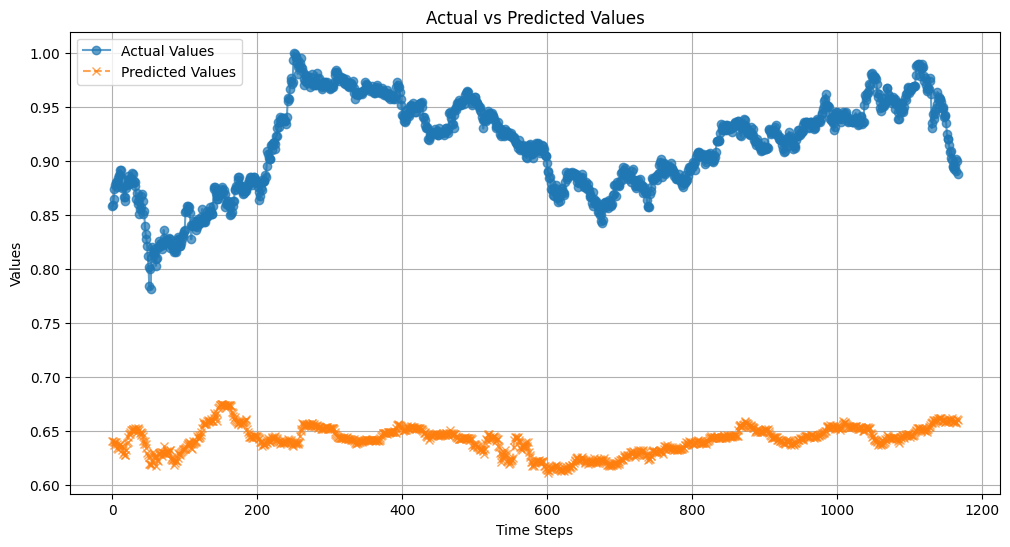

In [ ]:
X_test, y_test = create_sequences(x_test_same_df, y_test_same_df, wandb.config.time_steps)

y_pred = model_same_hyper9.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### 10

In [ ]:
wandb.init(project="LSTM - Same", name="hyper10", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 5,
    "lstm_units": [128,64,32],
    "optimizer": "adam",
    "loss": "rmse",
})

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/hyper10.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    #verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(x_train_same_df, y_train_same_df, time_steps)
X_val, y_val = create_sequences(x_val_same_df, y_val_same_df, time_steps)

model_same_hyper10 = tf.keras.Sequential([
    Bidirectional(tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(features)), return_sequences=True)),
    Bidirectional(tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh', return_sequences=True)),
    Bidirectional(tf.keras.layers.LSTM(wandb.config.lstm_units[2], activation='tanh')),

    Attention(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_same_hyper10.compile(optimizer=wandb.config.optimizer, loss=rmse_metric, metrics=[rmse_metric])

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_same_hyper10.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_rmse": history.history['rmse_metric'][0],
        "val_rmse": history.history['val_rmse_metric'][0],
    })

model_same_hyper10.summary()

wandb: Currently logged in as: yebin. Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - loss: 0.2694 - rmse_metric: 0.2694 - val_loss: 0.2573 - val_rmse_metric: 0.2597
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0868 - rmse_metric: 0.0868 - val_loss: 0.2499 - val_rmse_metric: 0.2521
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0704 - rmse_metric: 0.0704 - val_loss: 0.2345 - val_rmse_metric: 0.2367
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0664 - rmse_metric: 0.0664 - val_loss: 0.2285 - val_rmse_metric: 0.2307
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0681 - rmse_metric: 0.0681 - val_loss: 0.2325 - val_rmse_metric: 0.2346
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0748 - rmse_metric: 0.0748 - val_loss: 0.2326 - val_rmse_metric: 0.2345
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0746 - rmse_metric: 0.0746 - val_loss: 0.2378 - val_rmse_metric: 0.2398
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step -

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 5, 256)              │         167,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 5, 128)              │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention (Attention)                │ (None)                      │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,134,149 (4.33 MB)

 Trainable params: 378,049 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 756,100 (2.88 MB)

In [ ]:
wandb.finish()

##### 11

In [ ]:
wandb.init(project="LSTM - Same", name="hyper11", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 5,
    "lstm_units": [64,64,64],
    "optimizer": "adam",
    "loss": "rmse",
})

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/hyper11.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    #verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(x_train_same_df, y_train_same_df, time_steps)
X_val, y_val = create_sequences(x_val_same_df, y_val_same_df, time_steps)

model_same_hyper11 = tf.keras.Sequential([
    Bidirectional(tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(features)), return_sequences=True)),
    Bidirectional(tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh', return_sequences=True)),
    Bidirectional(tf.keras.layers.LSTM(wandb.config.lstm_units[2], activation='tanh')),

    Attention(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_same_hyper11.compile(optimizer=wandb.config.optimizer, loss=rmse_metric, metrics=[rmse_metric])

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_same_hyper11.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_rmse": history.history['rmse_metric'][0],
        "val_rmse": history.history['val_rmse_metric'][0],
    })

model_same_hyper11.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.2612 - rmse_metric: 0.2612 - val_loss: 0.3036 - val_rmse_metric: 0.3061
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0984 - rmse_metric: 0.0984 - val_loss: 0.3000 - val_rmse_metric: 0.3023
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0810 - rmse_metric: 0.0810 - val_loss: 0.3112 - val_rmse_metric: 0.3134
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0768 - rmse_metric: 0.0768 - val_loss: 0.3126 - val_rmse_metric: 0.3148
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0691 - rmse_metric: 0.0691 - val_loss: 0.3140 - val_rmse_metric: 0.3161
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0701 - rmse_metric: 0.0701 - val_loss: 0.3260 - val_rmse_metric: 0.3280
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0673 - rmse_metric: 0.0673 - val_loss: 0.3262 - val_rmse_metric: 0.3283
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_3 (Bidirectional)      │ (None, 5, 128)              │          51,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, 5, 128)              │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention_1 (Attention)              │ (None)                      │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 797,189 (3.04 MB)

 Trainable params: 265,729 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 531,460 (2.03 MB)

In [ ]:
wandb.finish()

##### 12

In [ ]:
wandb.login(relogin=True)

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
wandb.init(project="LSTM - Same", name="hyper12", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 10,
    "lstm_units": [128,64],
    "optimizer": "adam",
    "loss": "rmse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/hyper12.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    #verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(x_train_same_df, y_train_same_df, time_steps)
X_val, y_val = create_sequences(x_val_same_df, y_val_same_df, time_steps)

model_same_hyper12 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(time_steps, len(features))),
    tf.keras.layers.MaxPooling1D(2),

    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),

    Bidirectional(tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', return_sequences=True)),
    Bidirectional(tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh')),
    Attention(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1)
])

model_same_hyper12.compile(optimizer=wandb.config.optimizer, loss=rmse_metric, metrics=[rmse_metric])

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_same_hyper12.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_rmse": history.history['rmse_metric'][0],
        "val_rmse": history.history['val_rmse_metric'][0],
    })

model_same_hyper12.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 0.2730 - rmse_metric: 0.2730 - val_loss: 0.2258 - val_rmse_metric: 0.2287
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0504 - rmse_metric: 0.0504 - val_loss: 0.2094 - val_rmse_metric: 0.2122
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0399 - rmse_metric: 0.0399 - val_loss: 0.2009 - val_rmse_metric: 0.2035
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0365 - rmse_metric: 0.0365 - val_loss: 0.1926 - val_rmse_metric: 0.1950
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0356 - rmse_metric: 0.0356 - val_loss: 0.1907 - val_rmse_metric: 0.1932
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0319 - rmse_metric: 0.0319 - val_loss: 0.1795 - val_rmse_metric: 0.1818
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0335 - rmse_metric: 0.0335 - val_loss: 0.1882 - val_rmse_metric: 0.1906
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - 

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 8, 64)               │           6,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 2, 64)               │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_10 (Bidirectional)     │ (None, 1, 256)              │         197,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_11 (Bidirectional)     │ (None, 128)                 │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention_4 (Attention)              │ (None)                      │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,193,477 (4.55 MB)

 Trainable params: 397,825 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 795,652 (3.04 MB)

37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step


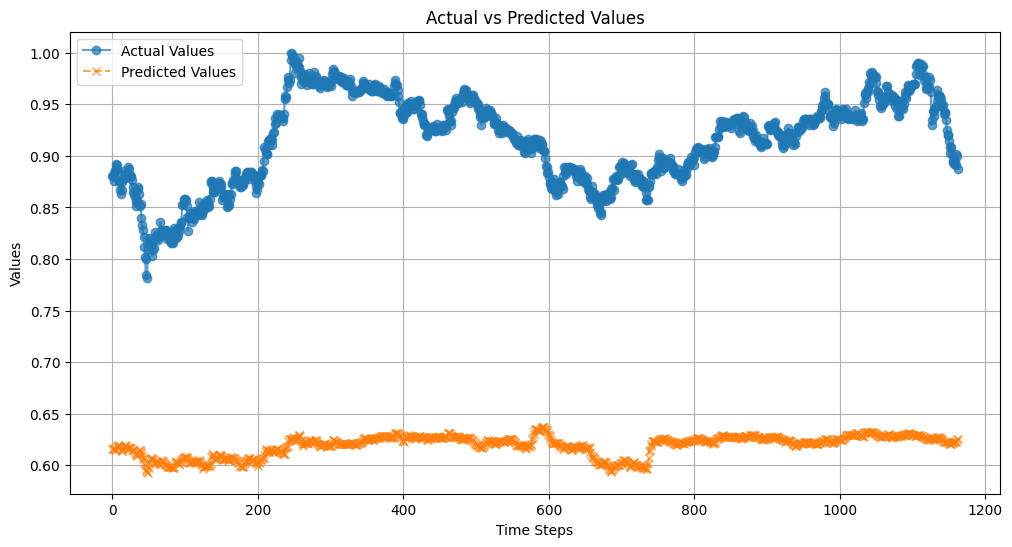

In [ ]:
X_test, y_test = create_sequences(x_test_same_df, y_test_same_df, wandb.config.time_steps)

y_pred = model_same_hyper12.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

### Feature Selection

##### 13

In [ ]:
wandb.init(project="LSTM - Same", name="hyper13", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 10,
    "lstm_units": [128,64],
    "optimizer": "adam",
    "loss": "rmse",
})

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/hyper13.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    #verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_same_df, selected_y_train_same_df, time_steps)
X_val, y_val = create_sequences(selected_x_val_same_df, selected_y_val_same_df, time_steps)

model_same_hyper13 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(time_steps, len(selected_features))),
    tf.keras.layers.MaxPooling1D(2),

    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),

    tf.keras.layers.Dropout(0.2),

    Bidirectional(tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', return_sequences=True)),
    Bidirectional(tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh')),
    Attention(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1)
])

model_same_hyper13.compile(optimizer=wandb.config.optimizer, loss=rmse_metric, metrics=[rmse_metric])

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_same_hyper13.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_rmse": history.history['rmse_metric'][0],
        "val_rmse": history.history['val_rmse_metric'][0],
    })

model_same_hyper13.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - loss: 0.2851 - rmse_metric: 0.2851 - val_loss: 0.3464 - val_rmse_metric: 0.3483
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1231 - rmse_metric: 0.1231 - val_loss: 0.1095 - val_rmse_metric: 0.1109
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0487 - rmse_metric: 0.0487 - val_loss: 0.1026 - val_rmse_metric: 0.1039
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0459 - rmse_metric: 0.0459 - val_loss: 0.1265 - val_rmse_metric: 0.1279
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0423 - rmse_metric: 0.0423 - val_loss: 0.1051 - val_rmse_metric: 0.1064
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0401 - rmse_metric: 0.0401 - val_loss: 0.1119 - val_rmse_metric: 0.1134
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0379 - rmse_metric: 0.0379 - val_loss: 0.1154 - val_rmse_metric: 0.1169
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step -

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 8, 64)               │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 2, 64)               │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 1, 256)              │         197,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 128)                 │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention_1 (Attention)              │ (None)                      │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,181,381 (4.51 MB)

 Trainable params: 393,793 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 787,588 (3.00 MB)

37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step


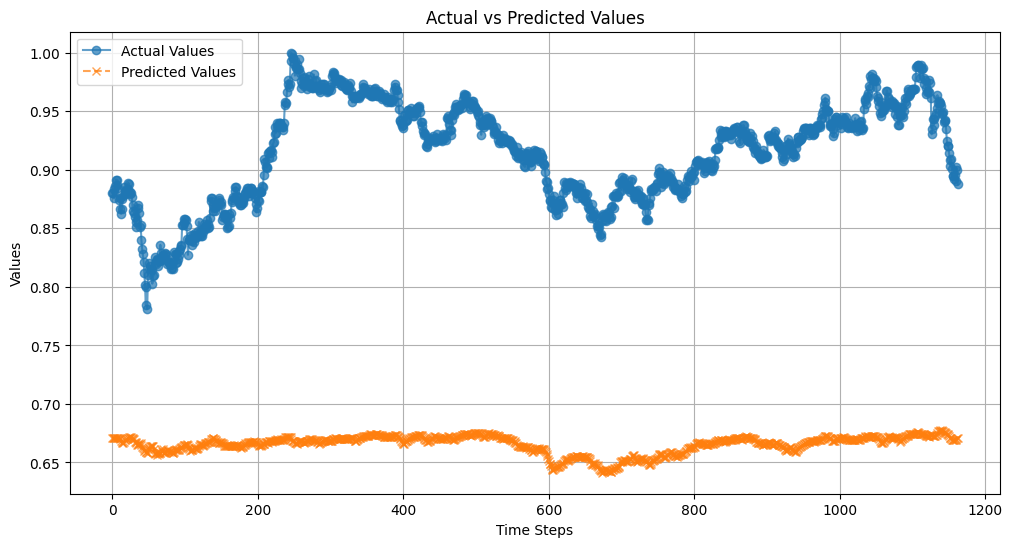

In [ ]:
X_test, y_test = create_sequences(selected_x_test_same_df, selected_y_test_same_df, wandb.config.time_steps)

y_pred = model_same_hyper13.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### 14

In [ ]:
wandb.init(project="LSTM - Same", name="hyper14", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 10,
    "lstm_units": [64,32],
    "optimizer": "adam",
    "loss": "rmse",
})

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/hyper14.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    #verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_same_df, selected_y_train_same_df, time_steps)
X_val, y_val = create_sequences(selected_x_val_same_df, selected_y_val_same_df, time_steps)

model_same_hyper14 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, len(selected_features))),
    tf.keras.layers.MaxPooling1D(2),

    tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),

    tf.keras.layers.Dropout(0.2),

    Bidirectional(tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', return_sequences=True)),
    Bidirectional(tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh')),
    Attention(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

model_same_hyper14.compile(optimizer=wandb.config.optimizer, loss=rmse_metric, metrics=[rmse_metric])

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_same_hyper14.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_rmse": history.history['rmse_metric'][0],
        "val_rmse": history.history['val_rmse_metric'][0],
    })

model_same_hyper14.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.3246 - rmse_metric: 0.3246 - val_loss: 0.3649 - val_rmse_metric: 0.3668
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1592 - rmse_metric: 0.1592 - val_loss: 0.2957 - val_rmse_metric: 0.2979
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1248 - rmse_metric: 0.1248 - val_loss: 0.2177 - val_rmse_metric: 0.2195
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1143 - rmse_metric: 0.1143 - val_loss: 0.2157 - val_rmse_metric: 0.2174
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1074 - rmse_metric: 0.1074 - val_loss: 0.2444 - val_rmse_metric: 0.2461
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1034 - rmse_metric: 0.1034 - val_loss: 0.2241 - val_rmse_metric: 0.2257
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.1034 - rmse_metric: 0.1034 - val_loss: 0.2454 - val_rmse_metric: 0.2470
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 8, 32)               │           1,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 4, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 2, 32)               │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, 1, 128)              │          49,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention_2 (Attention)              │ (None)                      │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None)                      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 298,853 (1.14 MB)

 Trainable params: 99,617 (389.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 199,236 (778.27 KB)

37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step


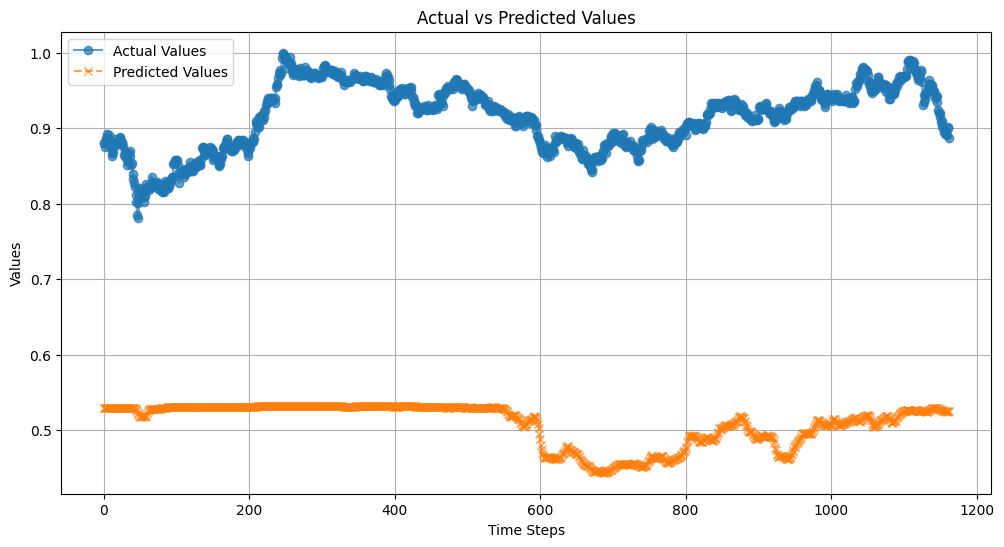

In [ ]:
X_test, y_test = create_sequences(selected_x_test_same_df, selected_y_test_same_df, wandb.config.time_steps)

y_pred = model_same_hyper14.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### 15

In [ ]:
wandb.init(project="LSTM - Same", name="hyper15", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 30,
    "lstm_units": [64,32],
    "optimizer": "adam",
    "loss": "rmse",
})

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/hyper15.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_same_df, selected_y_train_same_df, time_steps)
X_val, y_val = create_sequences(selected_x_val_same_df, selected_y_val_same_df, time_steps)

model_same_hyper15 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, len(selected_features))),
    tf.keras.layers.MaxPooling1D(2),

    tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),

    tf.keras.layers.Dropout(0.2),

    Bidirectional(tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', return_sequences=True)),
    Bidirectional(tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh')),
    Attention(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

model_same_hyper15.compile(optimizer=wandb.config.optimizer, loss=rmse_metric, metrics=[rmse_metric])

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_same_hyper15.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_rmse": history.history['rmse_metric'][0],
        "val_rmse": history.history['val_rmse_metric'][0],
    })

model_same_hyper15.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 0.3093 - rmse_metric: 0.3093 - val_loss: 0.1936 - val_rmse_metric: 0.1940
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0938 - rmse_metric: 0.0937 - val_loss: 0.1554 - val_rmse_metric: 0.1558
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0876 - rmse_metric: 0.0876 - val_loss: 0.1579 - val_rmse_metric: 0.1584
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0891 - rmse_metric: 0.0891 - val_loss: 0.1497 - val_rmse_metric: 0.1502
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0870 - rmse_metric: 0.0870 - val_loss: 0.1375 - val_rmse_metric: 0.1380
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0765 - rmse_metric: 0.0765 - val_loss: 0.1543 - val_rmse_metric: 0.1549
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0782 - rmse_metric: 0.0782 - val_loss: 0.1485 - val_rmse_metric: 0.1490
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)                    │ (None, 28, 32)              │           1,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 14, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 12, 32)              │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 6, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 6, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_6 (Bidirectional)      │ (None, 6, 128)              │          49,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention_3 (Attention)              │ (None)                      │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None)                      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 299,141 (1.14 MB)

 Trainable params: 99,713 (389.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 199,428 (779.02 KB)

36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step


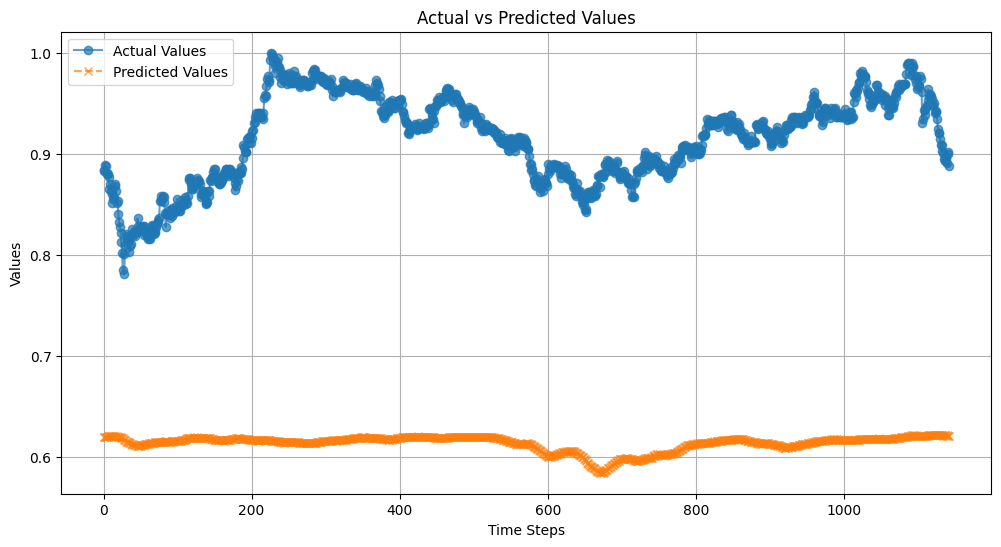

In [ ]:
X_test, y_test = create_sequences(selected_x_test_same_df, selected_y_test_same_df, wandb.config.time_steps)

y_pred = model_same_hyper15.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# Interpolation

##### base

In [ ]:
wandb.init(project="LSTM - Interp", name="initial", config={
    "epochs": 30,
    "batch_size": 32,
    "time_steps": 30,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "rmse",
},reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_Initial.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(x_train_int_df, y_train_int_df, time_steps)
X_val, y_val = create_sequences(x_val_int_df, y_val_int_df, time_steps)

model_int_init = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(features)), return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),
    tf.keras.layers.Dense(1)
])

model_int_init.compile(optimizer=wandb.config.optimizer, loss=rmse_metric, metrics=[rmse_metric])

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_init.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks = [early_stopping, model_checkpoint]
    )

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_rmse": history.history['rmse_metric'][0],
        "val_rmse": history.history['val_rmse_metric'][0],
    })

model_int_init.summary()

wandb: Currently logged in as: yebin. Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0717 - rmse_metric: 0.0717
Epoch 1: val_loss improved from inf to 0.13316, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_Initial.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0714 - rmse_metric: 0.0714 - val_loss: 0.1332 - val_rmse_metric: 0.1340
Epoch 2/30
101/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0340 - rmse_metric: 0.0340
Epoch 1: val_loss did not improve from 0.13316
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0335 - rmse_metric: 0.0335 - val_loss: 0.1817 - val_rmse_metric: 0.1826
Epoch 3/30
106/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0285 - rmse_metric: 0.0285
Epoch 1: val_loss did not improve from 0.13316
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0283 - rmse_metric: 0.0283 - val_loss: 0.1979 - val_rmse_metric: 0.1988
Epoch 4/30
103/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0344 - rmse_metric: 0.0344
Epoch 1: val_loss did

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 64)              │          25,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176,069 (687.77 KB)

 Trainable params: 58,689 (229.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 117,380 (458.52 KB)

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


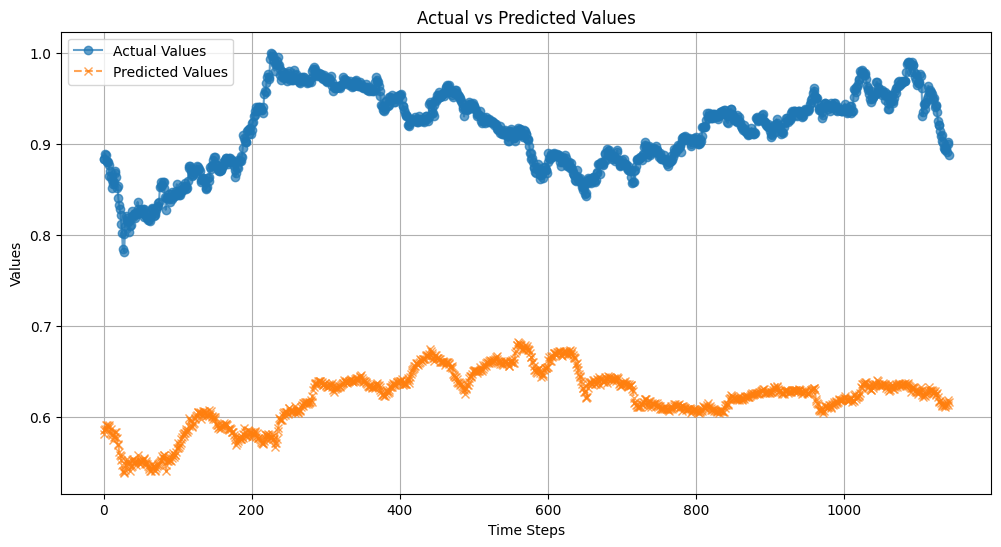

In [ ]:
X_test, y_test = create_sequences(x_test_same_df, y_test_same_df, wandb.config.time_steps)

y_pred = model_int_init.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### Init - 1

In [ ]:
wandb.init(project="LSTM - Interp", name="initial_1", config={
    "epochs": 30,
    "batch_size": 32,
    "time_steps": 30,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "mse",  # mse로 변경
}, reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_Initial_1.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(x_train_int_df, y_train_int_df, time_steps)
X_val, y_val = create_sequences(x_val_int_df, y_val_int_df, time_steps)

model_int_init_1 = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(features)), return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),
    tf.keras.layers.Dense(1)
])

# Compile 단계에서 loss를 mse로 변경
model_int_init_1.compile(optimizer=wandb.config.optimizer, loss='mse', metrics=['mse'])

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_init_1.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[early_stopping, model_checkpoint]
    )

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],  # mse로 수정
        "val_mse": history.history['val_mse'][0],  # mse로 수정
    })

model_int_init_1.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0254 - mse: 0.0254
Epoch 1: val_loss improved from inf to 0.03352, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_Initial_1.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0253 - mse: 0.0253 - val_loss: 0.0335 - val_mse: 0.0335
Epoch 2/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0014 - mse: 0.0014
Epoch 1: val_loss improved from 0.03352 to 0.02569, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_Initial_1.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 3/30
105/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.9669e-04 - mse: 5.9669e-04
Epoch 1: val_loss did not improve from 0.02569
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.9648e-04 - mse: 5.9648e-04 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 4/30
108/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 30, 64)              │          25,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176,069 (687.77 KB)

 Trainable params: 58,689 (229.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 117,380 (458.52 KB)

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


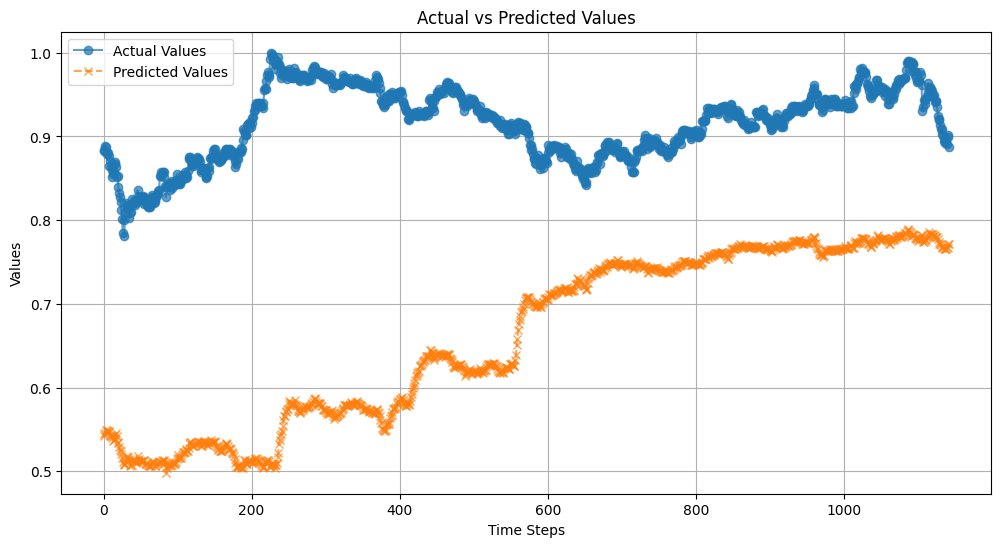

In [ ]:
X_test, y_test = create_sequences(x_test_same_df, y_test_same_df, wandb.config.time_steps)

y_pred = model_int_init_1.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### Hyper1

In [ ]:
wandb.init(project="LSTM - Interp", name="hyper_1", config={
    "epochs": 30,
    "batch_size": 32,
    "time_steps": 5,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "mse",  # mse로 변경
}, reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_1.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(x_train_int_df, y_train_int_df, time_steps)
X_val, y_val = create_sequences(x_val_int_df, y_val_int_df, time_steps)

model_int_hyper_1 = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(features)), return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),
    tf.keras.layers.Dense(1)
])

# Compile 단계에서 loss를 mse로 변경
model_int_hyper_1.compile(optimizer=wandb.config.optimizer, loss='mse', metrics=['mse'])

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper_1.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[early_stopping, model_checkpoint]
    )

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],  # mse로 수정
        "val_mse": history.history['val_mse'][0],  # mse로 수정
    })

model_int_hyper_1.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
102/110 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0194 - mse: 0.0194
Epoch 1: val_loss improved from inf to 0.03305, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_1.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0183 - mse: 0.0183 - val_loss: 0.0331 - val_mse: 0.0331
Epoch 2/30
108/110 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010 - mse: 0.0010
Epoch 1: val_loss improved from 0.03305 to 0.02748, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_1.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 3/30
109/110 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.7459e-04 - mse: 6.7459e-04
Epoch 1: val_loss improved from 0.02748 to 0.02332, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_1.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 5, 64)               │          25,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176,069 (687.77 KB)

 Trainable params: 58,689 (229.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 117,380 (458.52 KB)

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


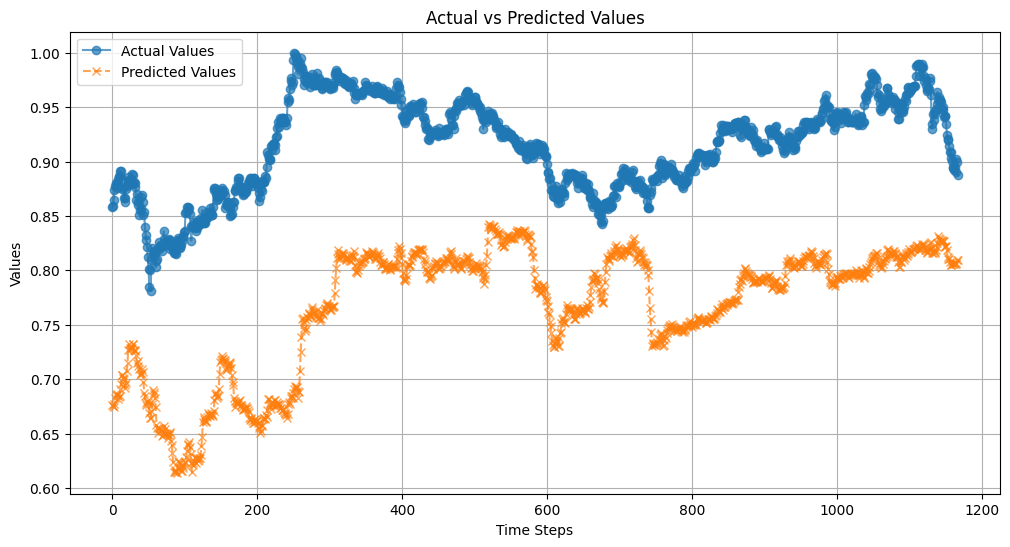

In [ ]:
X_test, y_test = create_sequences(x_test_same_df, y_test_same_df, wandb.config.time_steps)

y_pred = model_int_hyper_1.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### hyper2

In [ ]:
wandb.init(project="LSTM - Interp", name="hyper_2", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 5,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "mse",  # mse로 변경
}, reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_2.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(x_train_int_df, y_train_int_df, time_steps)
X_val, y_val = create_sequences(x_val_int_df, y_val_int_df, time_steps)

model_int_hyper_2 = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(features)), return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),
    tf.keras.layers.Dense(1)
])

# Compile 단계에서 loss를 mse로 변경
model_int_hyper_2.compile(optimizer=wandb.config.optimizer, loss='mse', metrics=['mse'])

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper_2.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[early_stopping, model_checkpoint]
    )

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],  # mse로 수정
        "val_mse": history.history['val_mse'][0],  # mse로 수정
    })

model_int_hyper_2.summary()


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


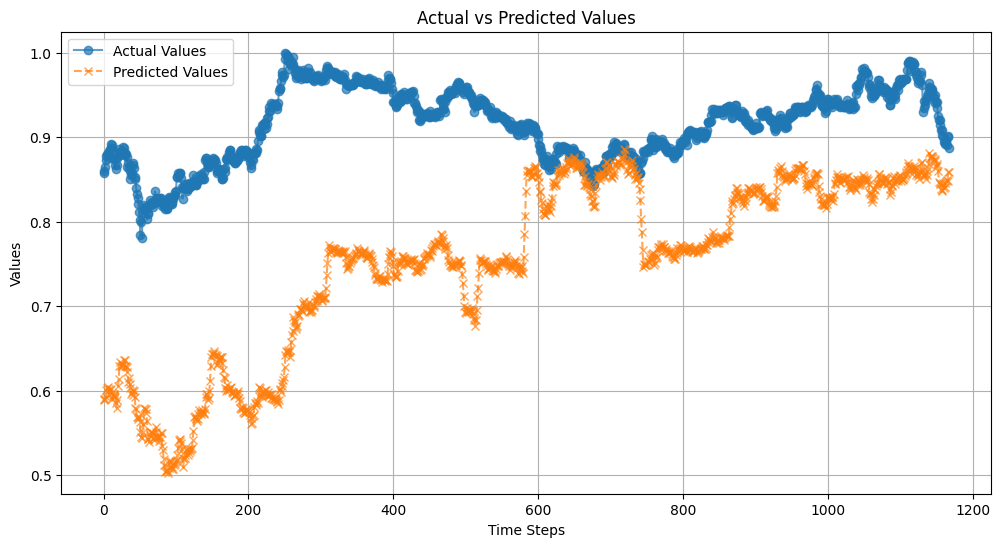

In [ ]:
X_test, y_test = create_sequences(x_test_same_df, y_test_same_df, wandb.config.time_steps)

y_pred = model_int_hyper_2.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### hyper3

In [ ]:
wandb.init(project="LSTM - Interp", name="hyper_3", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 5,
    "lstm_units": [64,32],
    "optimizer": "adam",
    "loss": "mse",  # mse로 변경
}, reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_3.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(x_train_int_df, y_train_int_df, time_steps)
X_val, y_val = create_sequences(x_val_int_df, y_val_int_df, time_steps)

model_int_hyper_3 = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(features)), return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),
    tf.keras.layers.Dense(1)
])

# Compile 단계에서 loss를 mse로 변경
model_int_hyper_3.compile(optimizer=wandb.config.optimizer, loss='mse', metrics=['mse'])

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper_3.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[early_stopping, model_checkpoint]
    )

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],  # mse로 수정
        "val_mse": history.history['val_mse'][0],  # mse로 수정
    })

model_int_hyper_3.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
109/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0393 - mse: 0.0393
Epoch 1: val_loss improved from inf to 0.03163, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_3.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0388 - mse: 0.0388 - val_loss: 0.0316 - val_mse: 0.0316
Epoch 2/50
105/110 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016 - mse: 0.0016
Epoch 1: val_loss improved from 0.03163 to 0.01953, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_3.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 3/50
108/110 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.3548e-04 - mse: 9.3548e-04
Epoch 1: val_loss improved from 0.01953 to 0.01614, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_3.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - los

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 5, 64)               │          25,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 5, 64)               │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 213,221 (832.90 KB)

 Trainable params: 71,073 (277.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,148 (555.27 KB)

37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step


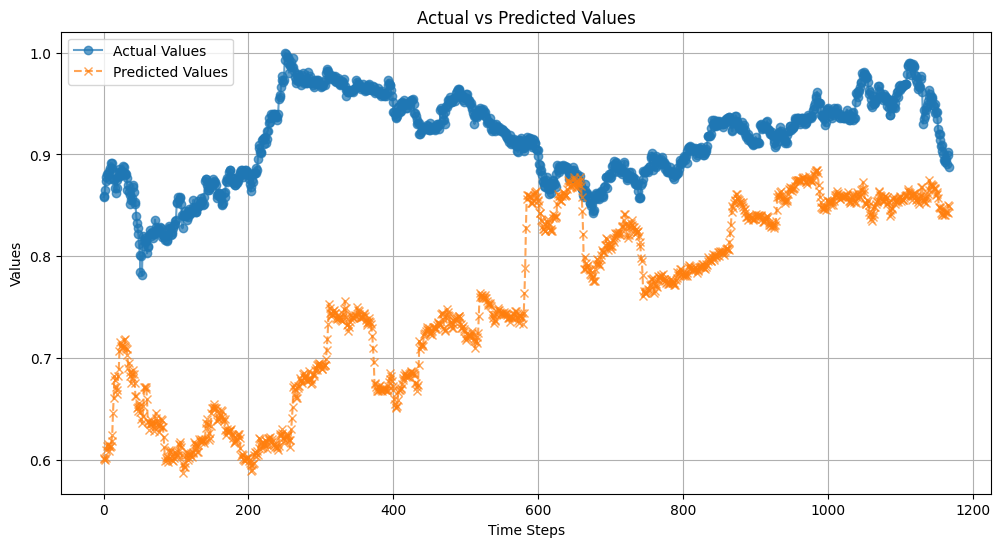

In [ ]:
X_test, y_test = create_sequences(x_test_same_df, y_test_same_df, wandb.config.time_steps)

y_pred = model_int_hyper_3.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

### Selected Features

##### Hyper4

In [ ]:
wandb.finish()

In [ ]:
wandb.init(project="LSTM - Interp", name="hyper_4", config={
    "epochs": 30,
    "batch_size": 32,
    "time_steps": 5,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "mse",  # mse로 변경
}, reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_4.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int_df, selected_y_train_int_df, time_steps)
X_val, y_val = create_sequences(selected_x_val_int_df, selected_y_val_int_df, time_steps)

model_int_hyper_4 = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(selected_features)), return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),
    tf.keras.layers.Dense(1)
])

# Compile 단계에서 loss를 mse로 변경
model_int_hyper_4.compile(optimizer=wandb.config.optimizer, loss='mse', metrics=['mse'])

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper_4.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[early_stopping, model_checkpoint]
    )

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],  # mse로 수정
        "val_mse": history.history['val_mse'][0],  # mse로 수정
    })

model_int_hyper_4.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
103/110 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0534 - mse: 0.0534
Epoch 1: val_loss improved from inf to 0.03523, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_4.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0509 - mse: 0.0509 - val_loss: 0.0352 - val_mse: 0.0352
Epoch 2/30
106/110 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017 - mse: 0.0017
Epoch 1: val_loss improved from 0.03523 to 0.02482, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_4.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 3/30
105/110 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - mse: 0.0014
Epoch 1: val_loss improved from 0.02482 to 0.01479, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_4.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 -

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_17 (LSTM)                       │ (None, 5, 64)               │          20,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 159,941 (624.77 KB)

 Trainable params: 53,313 (208.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 106,628 (416.52 KB)

In [ ]:
X_train.shape

(3514, 5, 14)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


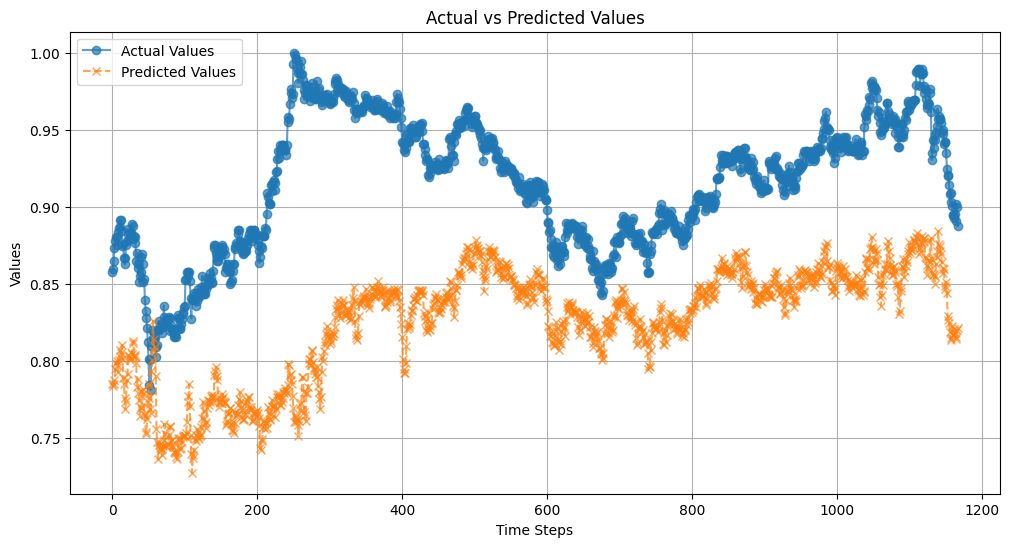

In [ ]:
X_test, y_test = create_sequences(selected_x_test_same_df, selected_y_test_same_df, wandb.config.time_steps)

y_pred = model_int_hyper_4.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### Hyper5

In [ ]:
wandb.init(project="LSTM - Interp", name="hyper_5", config={
    "epochs": 50,
    "batch_size": 62,
    "time_steps": 5,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_5.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int_df, selected_y_train_int_df, time_steps)
X_val, y_val = create_sequences(selected_x_val_int_df, selected_y_val_int_df, time_steps)

model_int_hyper_5 = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(selected_features)), return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh'),
    tf.keras.layers.Dense(1)
])


model_int_hyper_5.compile(optimizer=wandb.config.optimizer, loss='mse', metrics=['mse'])

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper_5.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[early_stopping, model_checkpoint]
    )

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
    })

model_int_hyper_5.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0428 - mse: 0.0428
Epoch 1: val_loss improved from inf to 0.05477, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_5.weights.h5
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0424 - mse: 0.0424 - val_loss: 0.0548 - val_mse: 0.0548
Epoch 2/50
56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019 - mse: 0.0019
Epoch 1: val_loss improved from 0.05477 to 0.03117, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_5.weights.h5
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0312 - val_mse: 0.0312
Epoch 3/50
56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0015 - mse: 0.0015
Epoch 1: val_loss improved from 0.03117 to 0.01941, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_5.weights.h5
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 - mse: 0.001

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_19 (LSTM)                       │ (None, 5, 64)               │          20,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_20 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 159,941 (624.77 KB)

 Trainable params: 53,313 (208.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 106,628 (416.52 KB)

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


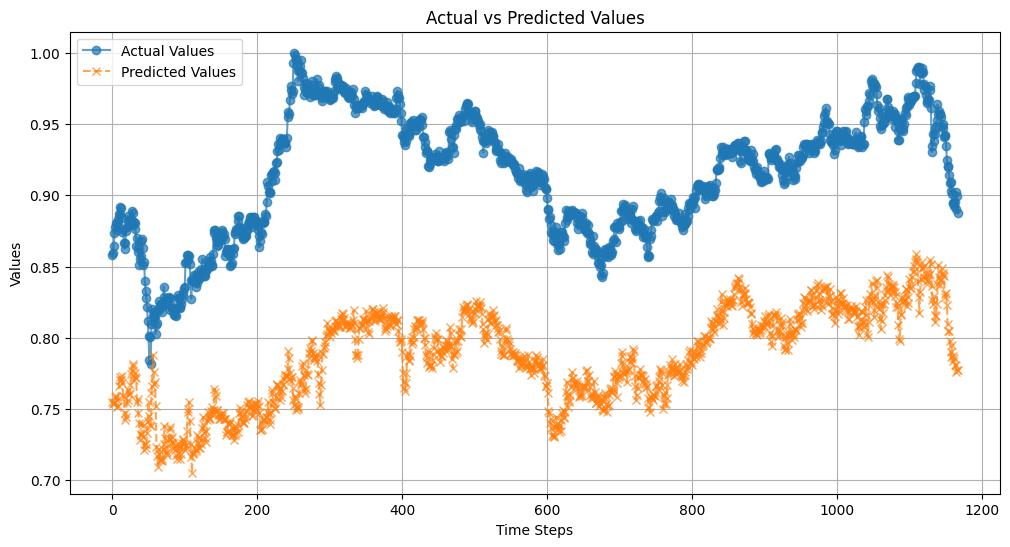

In [ ]:
X_test, y_test = create_sequences(selected_x_test_same_df, selected_y_test_same_df, wandb.config.time_steps)

y_pred = model_int_hyper_5.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### Hyper 6

In [ ]:
wandb.init(project="LSTM - Interp", name="hyper_6", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 5,
    "lstm_units": [128, 64, 32],
    "optimizer": "adam",
    "loss": "mse",  # mse로 변경
}, reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_6.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int_df, selected_y_train_int_df, time_steps)
X_val, y_val = create_sequences(selected_x_val_int_df, selected_y_val_int_df, time_steps)

model_int_hyper_6 = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(selected_features)), return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[2], activation='tanh'),
    tf.keras.layers.Dense(1)
])

# Compile 단계에서 loss를 mse로 변경
model_int_hyper_6.compile(optimizer=wandb.config.optimizer, loss='mse', metrics=['mse'])

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper_6.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[early_stopping, model_checkpoint]
    )

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],  # mse로 수정
        "val_mse": history.history['val_mse'][0],  # mse로 수정
    })

model_int_hyper_6.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
109/110 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0470 - mse: 0.0470
Epoch 1: val_loss improved from inf to 0.01532, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_6.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0465 - mse: 0.0465 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 2/50
106/110 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0017 - mse: 0.0017
Epoch 1: val_loss improved from 0.01532 to 0.01528, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_6.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 3/50
104/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - mse: 0.0013
Epoch 1: val_loss did not improve from 0.01528
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 4/50
108/110 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.001

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                       │ (None, 5, 128)              │          73,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_22 (LSTM)                       │ (None, 5, 64)               │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_23 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 405,221 (1.55 MB)

 Trainable params: 135,073 (527.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 270,148 (1.03 MB)

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


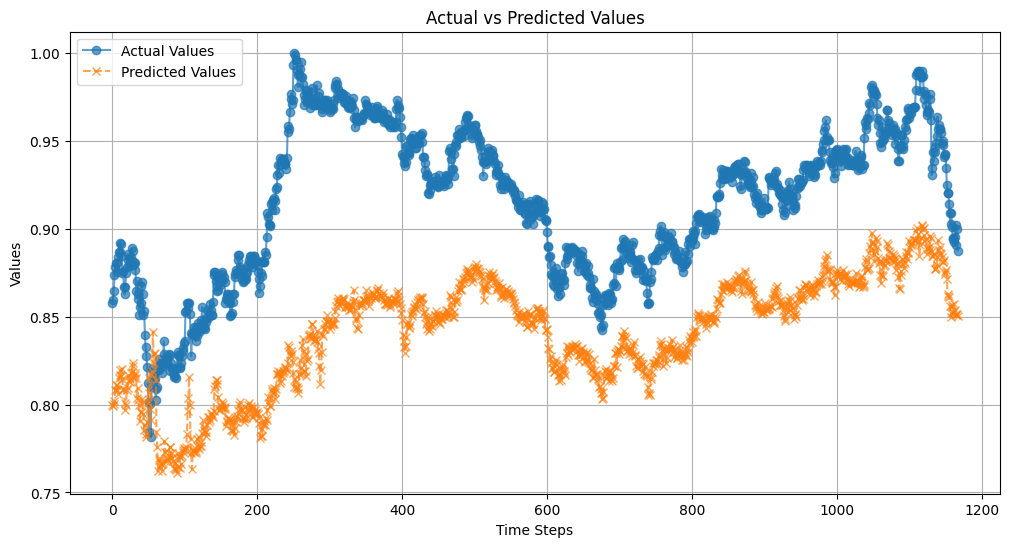

In [ ]:
X_test, y_test = create_sequences(selected_x_test_same_df, selected_y_test_same_df, wandb.config.time_steps)

y_pred = model_int_hyper_6.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### Hyper 7

In [ ]:
wandb.init(project="LSTM - Interp", name="hyper_7", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 5,
    "lstm_units": [128, 64, 32],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_7.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int_df, selected_y_train_int_df, time_steps)
X_val, y_val = create_sequences(selected_x_val_int_df, selected_y_val_int_df, time_steps)

model_int_hyper_7 = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(selected_features)), return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[2], activation='tanh'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile 단계에서 loss를 mse로 변경
model_int_hyper_7.compile(optimizer=wandb.config.optimizer, loss='mse', metrics=['mse'])

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper_7.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[early_stopping, model_checkpoint]
    )

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],  # mse로 수정
        "val_mse": history.history['val_mse'][0],  # mse로 수정
    })

model_int_hyper_7.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
104/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0489 - mse: 0.0489
Epoch 1: val_loss improved from inf to 0.02438, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_7.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0469 - mse: 0.0469 - val_loss: 0.0244 - val_mse: 0.0244
Epoch 2/50
102/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016 - mse: 0.0016
Epoch 1: val_loss improved from 0.02438 to 0.01083, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_7.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 3/50
107/110 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mse: 0.0012
Epoch 1: val_loss improved from 0.01083 to 0.01072, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_7.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0012 -

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                       │ (None, 5, 128)              │          73,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_25 (LSTM)                       │ (None, 5, 64)               │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_26 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 411,653 (1.57 MB)

 Trainable params: 137,217 (536.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 274,436 (1.05 MB)

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


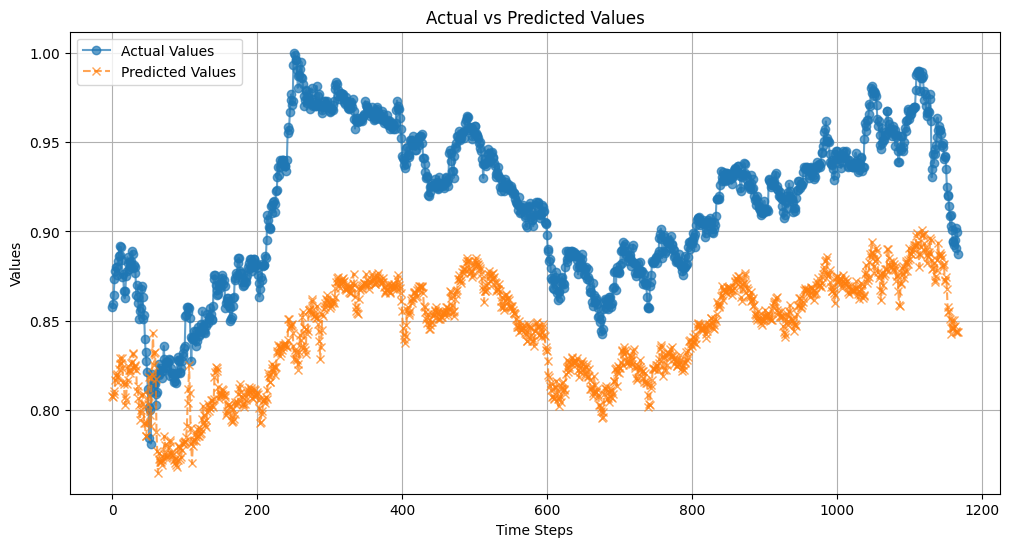

In [ ]:
X_test, y_test = create_sequences(selected_x_test_same_df, selected_y_test_same_df, wandb.config.time_steps)

y_pred = model_int_hyper_7.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### Hyper8

In [ ]:
wandb.finish()

In [ ]:
wandb.init(project="LSTM - Interp", name="hyper_8", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 5,
    "lstm_units": [256,128, 64, 32],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_8.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int_df, selected_y_train_int_df, time_steps)
X_val, y_val = create_sequences(selected_x_val_int_df, selected_y_val_int_df, time_steps)

model_int_hyper_8 = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(selected_features)), return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[2], activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[3], activation='tanh'),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile 단계에서 loss를 mse로 변경
model_int_hyper_8.compile(optimizer=wandb.config.optimizer, loss='mse', metrics=['mse'])

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper_8.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[early_stopping, model_checkpoint]
    )

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],  # mse로 수정
        "val_mse": history.history['val_mse'][0],  # mse로 수정
    })

model_int_hyper_8.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
105/110 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0621 - mse: 0.0621
Epoch 1: val_loss improved from inf to 0.01891, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_8.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0599 - mse: 0.0599 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 2/50
105/110 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016 - mse: 0.0016
Epoch 1: val_loss improved from 0.01891 to 0.01344, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_8.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 3/50
104/110 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0012 - mse: 0.0012
Epoch 1: val_loss did not improve from 0.01344
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 4/50
105/110 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.05

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_31 (LSTM)                       │ (None, 5, 256)              │         277,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_32 (LSTM)                       │ (None, 5, 128)              │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_33 (LSTM)                       │ (None, 5, 64)               │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_34 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,615,877 (6.16 MB)

 Trainable params: 538,625 (2.05 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,077,252 (4.11 MB)

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


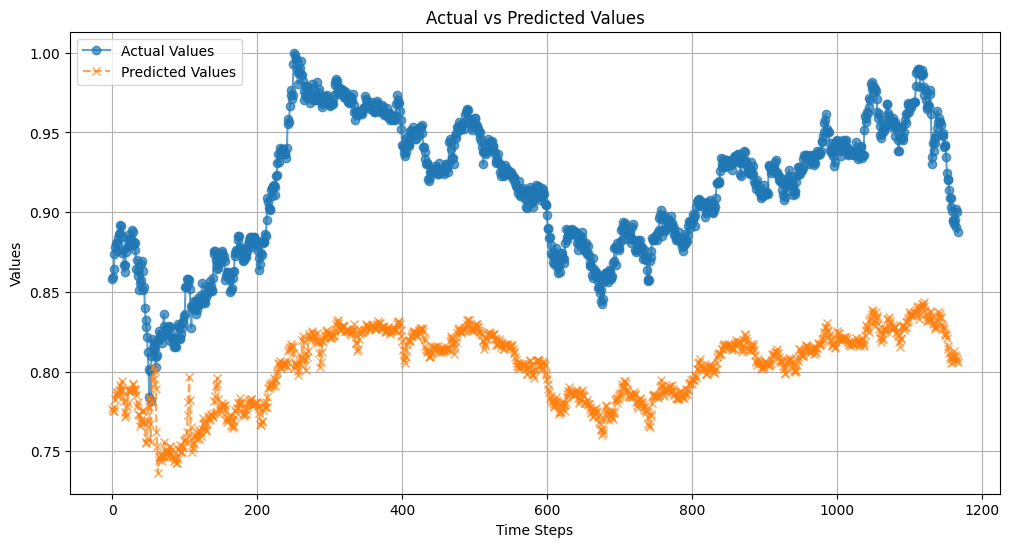

In [ ]:
X_test, y_test = create_sequences(selected_x_test_same_df, selected_y_test_same_df, wandb.config.time_steps)

y_pred = model_int_hyper_8.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### Hyper 9

In [ ]:
wandb.init(project="LSTM - Interp", name="hyper_9", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 5,
    "lstm_units": [128, 64, 32],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_9.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int_df, selected_y_train_int_df, time_steps)
X_val, y_val = create_sequences(selected_x_val_int_df, selected_y_val_int_df, time_steps)

model_int_hyper_9 = tf.keras.Sequential([
    Bidirectional(tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(selected_features)), return_sequences=True)),
    Bidirectional(tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh', return_sequences=True)),
    Bidirectional(tf.keras.layers.LSTM(wandb.config.lstm_units[2], activation='tanh')),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile 단계에서 loss를 mse로 변경
model_int_hyper_9.compile(optimizer=wandb.config.optimizer, loss='mse', metrics=['mse'])

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper_9.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[early_stopping, model_checkpoint]
    )

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],  # mse로 수정
        "val_mse": history.history['val_mse'][0],  # mse로 수정
    })

model_int_hyper_9.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0309 - mse: 0.0309
Epoch 1: val_loss improved from inf to 0.01880, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_9.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0307 - mse: 0.0307 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 2/50
109/110 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0014 - mse: 0.0014
Epoch 1: val_loss improved from 0.01880 to 0.01016, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_9.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 3/50
109/110 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0011 - mse: 0.0011
Epoch 1: val_loss improved from 0.01016 to 0.00600, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_9.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 5, 256)              │         146,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 5, 128)              │         164,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,068,677 (4.08 MB)

 Trainable params: 356,225 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 712,452 (2.72 MB)

37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step


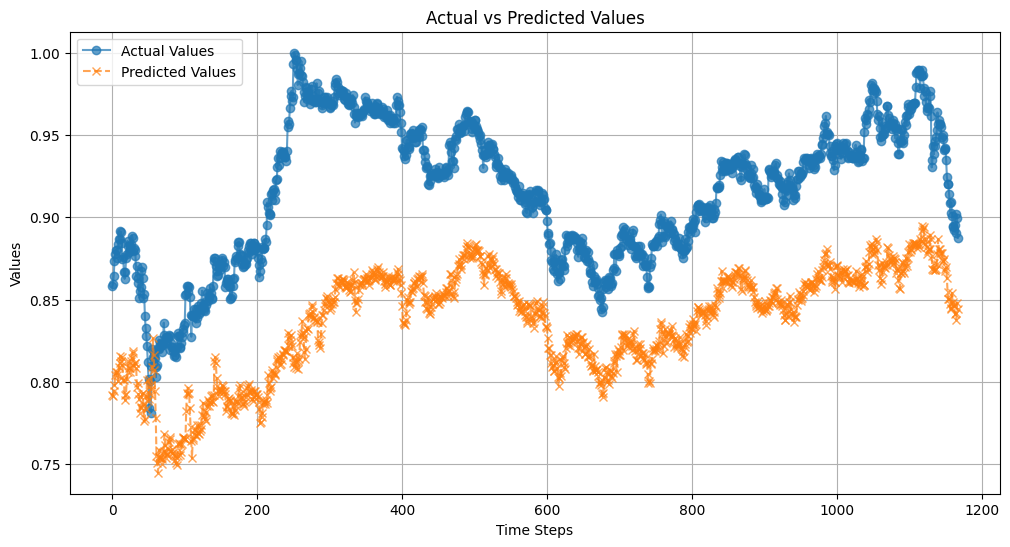

In [ ]:
X_test, y_test = create_sequences(selected_x_test_same_df, selected_y_test_same_df, wandb.config.time_steps)

y_pred = model_int_hyper_9.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

##### 10

In [ ]:
wandb.finish()

In [ ]:
re_x_train = selected_x_int[:3519]
re_y_train = selected_y_int[:3519]

re_x_val = selected_x_int[3519:4692]
re_y_val = selected_y_int[3519:4692]

re_x_test = selected_x_int[4692:]
re_y_test = selected_y_int[4692:]

# MinMaxScaler 초기화
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

# Train 데이터에 fit_transform 수행
x_train_int = x_scaler.fit_transform(re_x_train)
y_train_int = y_scaler.fit_transform(re_y_train.reshape(-1, 1))

# Validation, Test 데이터는 transform만 수행
x_val_int = x_scaler.transform(re_x_val)
y_val_int = y_scaler.transform(re_y_val.reshape(-1, 1))

x_test_int = x_scaler.transform(re_x_test)
y_test_int = y_scaler.transform(re_y_test.reshape(-1, 1))

In [ ]:
wandb.init(project="LSTM - Interp", name="hyper_10", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 5,
    "lstm_units": [128, 64, 32],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_10.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(x_train_int, y_train_int, time_steps)
X_val, y_val = create_sequences(x_val_int, y_val_int, time_steps)

model_int_hyper_10 = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(selected_features)), return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[2], activation='tanh'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile 단계에서 loss를 mse로 변경
model_int_hyper_10.compile(optimizer=wandb.config.optimizer, loss='mse', metrics=['mse'])

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper_10.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[early_stopping, model_checkpoint]
    )

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],  # mse로 수정
        "val_mse": history.history['val_mse'][0],  # mse로 수정
    })

model_int_hyper_10.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
105/110 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1022 - mse: 0.1022
Epoch 1: val_loss improved from inf to 0.02121, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_10.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0984 - mse: 0.0984 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 2/50
103/110 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7488e-04 - mse: 4.7488e-04
Epoch 1: val_loss improved from 0.02121 to 0.01628, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_10.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.7216e-04 - mse: 4.7216e-04 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 3/50
106/110 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.7046e-04 - mse: 3.7046e-04
Epoch 1: val_loss did not improve from 0.01628
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.7046e-04 - mse: 3.7046e-04 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 4/50
108/110 ━━━━━━━━━━

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_41 (LSTM)                       │ (None, 5, 128)              │          73,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_42 (LSTM)                       │ (None, 5, 64)               │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_43 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 411,653 (1.57 MB)

 Trainable params: 137,217 (536.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 274,436 (1.05 MB)

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


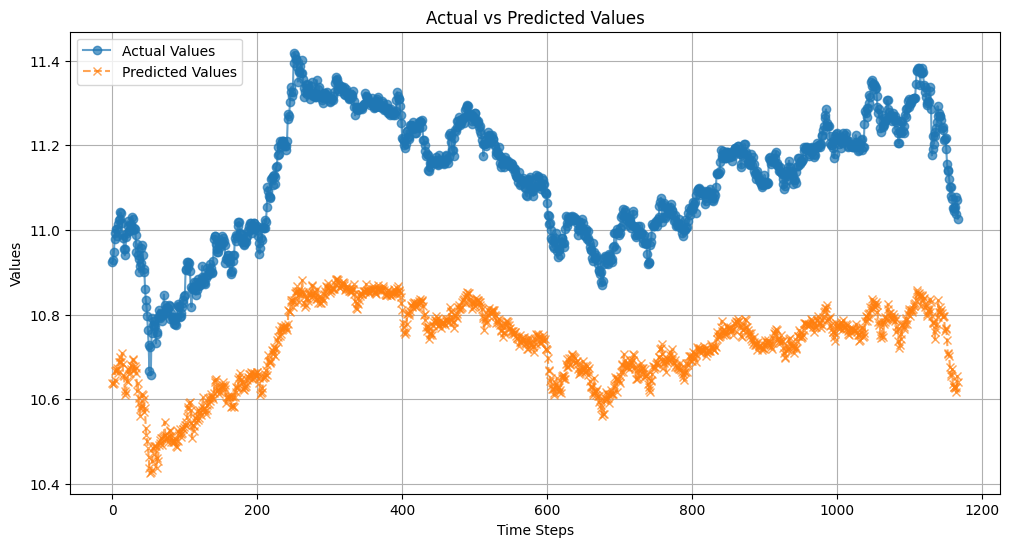

In [ ]:
X_test, y_test = create_sequences(x_test_int, y_test_int, wandb.config.time_steps)

y_pred = model_int_hyper_10.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred)
y_test = y_scaler.inverse_transform(y_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### 11

In [ ]:
wandb.init(project="LSTM - Interp", name="hyper_11", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 5,
    "lstm_units": [256, 128, 64, 32],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_11.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(x_train_int, y_train_int, time_steps)
X_val, y_val = create_sequences(x_val_int, y_val_int, time_steps)

model_int_hyper_11 = tf.keras.Sequential([
    tf.keras.layers.LSTM(wandb.config.lstm_units[0], activation='tanh', input_shape=(time_steps, len(selected_features)), return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[1], activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[2], activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(wandb.config.lstm_units[3], activation='tanh'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile 단계에서 loss를 mse로 변경
model_int_hyper_11.compile(optimizer=wandb.config.optimizer, loss='mse', metrics=['mse'])

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper_11.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[early_stopping, model_checkpoint]
    )

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],  # mse로 수정
        "val_mse": history.history['val_mse'][0],  # mse로 수정
    })

model_int_hyper_11.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
107/110 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0867 - mse: 0.0867
Epoch 1: val_loss improved from inf to 0.01495, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_11.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0845 - mse: 0.0845 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 2/50
107/110 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.8963e-04 - mse: 4.8963e-04
Epoch 1: val_loss improved from 0.01495 to 0.01372, saving model to /content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/Int_hyper_11.weights.h5
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.8909e-04 - mse: 4.8909e-04 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 3/50
109/110 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.3622e-04 - mse: 4.3622e-04
Epoch 1: val_loss did not improve from 0.01372
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.3587e-04 - mse: 4.3587e-04 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 4/50
107/110 ━━━━━━━━━━

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_44 (LSTM)                       │ (None, 5, 256)              │         277,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_45 (LSTM)                       │ (None, 5, 128)              │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_46 (LSTM)                       │ (None, 5, 64)               │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_47 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,615,877 (6.16 MB)

 Trainable params: 538,625 (2.05 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,077,252 (4.11 MB)

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


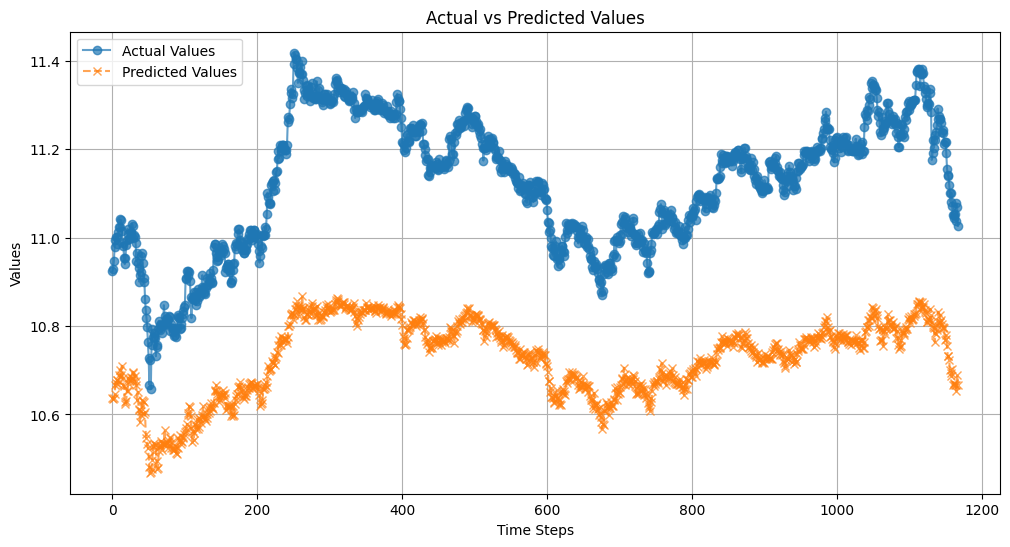

In [ ]:
X_test, y_test = create_sequences(x_test_int, y_test_int, wandb.config.time_steps)

y_pred = model_int_hyper_11.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred)
y_test = y_scaler.inverse_transform(y_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# Before Outlier Data Prepare

In [ ]:
same_df_1 = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/final_data/1beforeOut_same.csv')
int_df_1 = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/final_data/1beforeOut_int.csv')

In [ ]:
same_df_1.head()

Date  Open  High   Low  Close   Volume    Change  Transaction  \
0  2001-01-02  3160  3380  3140   3350   789127  0.060127   2643575450   
1  2001-01-03  3229  3420  3220   3370   757143  0.005970   2551571910   
2  2001-01-04  3790  3870  3660   3780  2398248  0.121662   9065377440   
3  2001-01-05  3760  3920  3700   3900  1562744  0.031746   6094701600   
4  2001-01-08  3820  3910  3780   3880   845911 -0.005128   3282134680   

   SE_Operating_Profit  SE_Net_Profit  ...  Exchange  SOX_Close  Phone  \
0         9.060340e+12   6.002880e+12  ...    1276.4      570.3    7.1   
1         9.060340e+12   6.002880e+12  ...    1270.1      670.2    7.1   
2         9.060340e+12   6.002880e+12  ...    1255.0      653.8    7.1   
3         9.060340e+12   6.002880e+12  ...    1263.5      617.5    7.1   
4         9.060340e+12   6.002880e+12  ...    1265.8      634.2    7.1   

   KR_Unemployment  Covid19  US_President_Republican  US_President_Democratic  \
0              4.4    False                     True                    False   
1              4.4    False                     True                    False   
2              4.4    False                     True                    False   
3              4.4    False                     True                    False   
4              4.4    False                     True                    False   

   KR_President_Democratic  KR_President_Conservative  KR_President_Neutral  
0                     True                      False                 False  
1                     True                      False                 False  
2                     True                      False                 False  
3                     True                      False                 False  
4                     True                      False                 False  

[5 rows x 37 columns]

In [ ]:
boolean_columns = [
    "Covid19",
    "US_President_Republican",
    "US_President_Democratic",
    "KR_President_Democratic",
    "KR_President_Conservative",
    "KR_President_Neutral"
]

same_df_1[boolean_columns] = same_df_1[boolean_columns].astype(bool)
int_df_1[boolean_columns] = int_df_1[boolean_columns].astype(bool)

same_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5865 entries, 0 to 5864
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       5865 non-null   object 
 1   Open                       5865 non-null   int64  
 2   High                       5865 non-null   int64  
 3   Low                        5865 non-null   int64  
 4   Close                      5865 non-null   int64  
 5   Volume                     5865 non-null   int64  
 6   Change                     5865 non-null   float64
 7   Transaction                5865 non-null   int64  
 8   SE_Operating_Profit        5865 non-null   float64
 9   SE_Net_Profit              5865 non-null   float64
 10  SE_Total_Equity            5865 non-null   float64
 11  SE_Total_Liabilities       5865 non-null   float64
 12  SE_Revenue                 5865 non-null   float64
 13  SE_Foreign                 5865 non-null   float

In [ ]:
# Set Index
same_df_1.set_index('Date', inplace = True)
int_df_1.set_index('Date', inplace = True)

# Normalization
features = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction','SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation', 'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate', 'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican', 'US_President_Democratic', 'KR_President_Democratic', 'KR_President_Conservative', 'KR_President_Neutral']
target = ['Close']

x_same_1 = same_df_1[features].values
y_same_1 = same_df_1[target].values

In [ ]:
x_scaler, y_scaler = MinMaxScaler(), MinMaxScaler()

x_same_scaled_1 = x_scaler.fit_transform(x_same_1)
y_same_scaled_1 = y_scaler.fit_transform(y_same_1.reshape(-1, 1))

x_int_1 = int_df_1[features].values
y_int_1 = int_df_1[target].values

x_scaler, y_scaler = MinMaxScaler(), MinMaxScaler()

x_int_scaled_1 = x_scaler.fit_transform(x_int_1)
y_int_scaled_1 = y_scaler.fit_transform(y_int_1.reshape(-1, 1))

# Train, Test Split
x_train_same_df_1 = x_same_scaled_1[:3519]
y_train_same_df_1 = y_same_scaled_1[:3519]

x_val_same_df_1 = x_same_scaled_1[3519:4692]
y_val_same_df_1 = y_same_scaled_1[3519:4692]

x_test_same_df_1 = x_same_scaled_1[4692:]
y_test_same_df_1 = y_same_scaled_1[4692:]

x_train_int_df_1 = x_int_scaled_1[:3519]
y_train_int_df_1 = y_int_scaled_1[:3519]

x_val_int_df_1 = x_int_scaled_1[3519:4692]
y_val_int_df_1 = y_int_scaled_1[3519:4692]

x_test_int_df_1 = x_int_scaled_1[4692:]
y_test_int_df_1 = y_int_scaled_1[4692:]

In [ ]:
# Normalization
selected_features = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction','SE_Foreign', 'US_Inflation', 'KR_Inflation', 'US_10', 'KR_10', 'WTI', 'Exchange', 'SOX_Close']
target = ['Close']

selected_x_same = same_df[selected_features].values
selected_y_same = same_df[target].values

x_scaler, y_scaler = MinMaxScaler(), MinMaxScaler()

selected_x_same_scaled = x_scaler.fit_transform(selected_x_same)
selected_y_same_scaled = y_scaler.fit_transform(selected_y_same.reshape(-1, 1))

selected_x_int = int_df[selected_features].values
selected_y_int = int_df[target].values

x_scaler, y_scaler = MinMaxScaler(), MinMaxScaler()

selected_x_int_scaled = x_scaler.fit_transform(selected_x_int)
selected_y_int_scaled = y_scaler.fit_transform(selected_y_int.reshape(-1, 1))

# Train, Test Split
selected_x_train_same_df = selected_x_same_scaled[:3519]
selected_y_train_same_df = selected_y_same_scaled[:3519]

selected_x_val_same_df = selected_x_same_scaled[3519:4692]
selected_y_val_same_df = selected_y_same_scaled[3519:4692]

selected_x_test_same_df = selected_x_same_scaled[4692:]
selected_y_test_same_df = selected_y_same_scaled[4692:]

selected_x_train_int_df = selected_x_int_scaled[:3519]
selected_y_train_int_df = selected_y_int_scaled[:3519]

selected_x_val_int_df = selected_x_int_scaled[3519:4692]
selected_y_val_int_df = selected_y_int_scaled[3519:4692]

selected_x_test_int_df = selected_x_int_scaled[4692:]
selected_y_test_int_df = selected_y_int_scaled[4692:]

# Before Outlier - Same

# Before Outlier - Interp